This notebook shows how I hand labeled each spot as cancerous or non-cancerous to generate my set of true labels.

In [1]:
from image import image_transform
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import cv2
import os

First, we load the image and gene expression data of layer we want to label.

In [2]:
from analysis import get_transformed_spatial_coordinates

path = os.getcwd()
layer = path + "/breast_cancer_data/Layer4_BC_count_matrix-1.tsv"
image = path + "/breast_cancer_data/HE_layer4_BC.jpg"

spatial_xy = get_transformed_spatial_coordinates(layer)
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Next, we define a function that lets us plot a few points at a time. In a separate file, manually construct your true labels.

In [3]:
def plot(a, b):
    plt.figure(figsize= (27,27))
    plt.scatter(spatial_xy['x'][a:b], spatial_xy['y'][a:b], color = 'white')
    plt.imshow(image)
    plt.grid(b = True)
    plt.xlabel('x')
    plt.show()

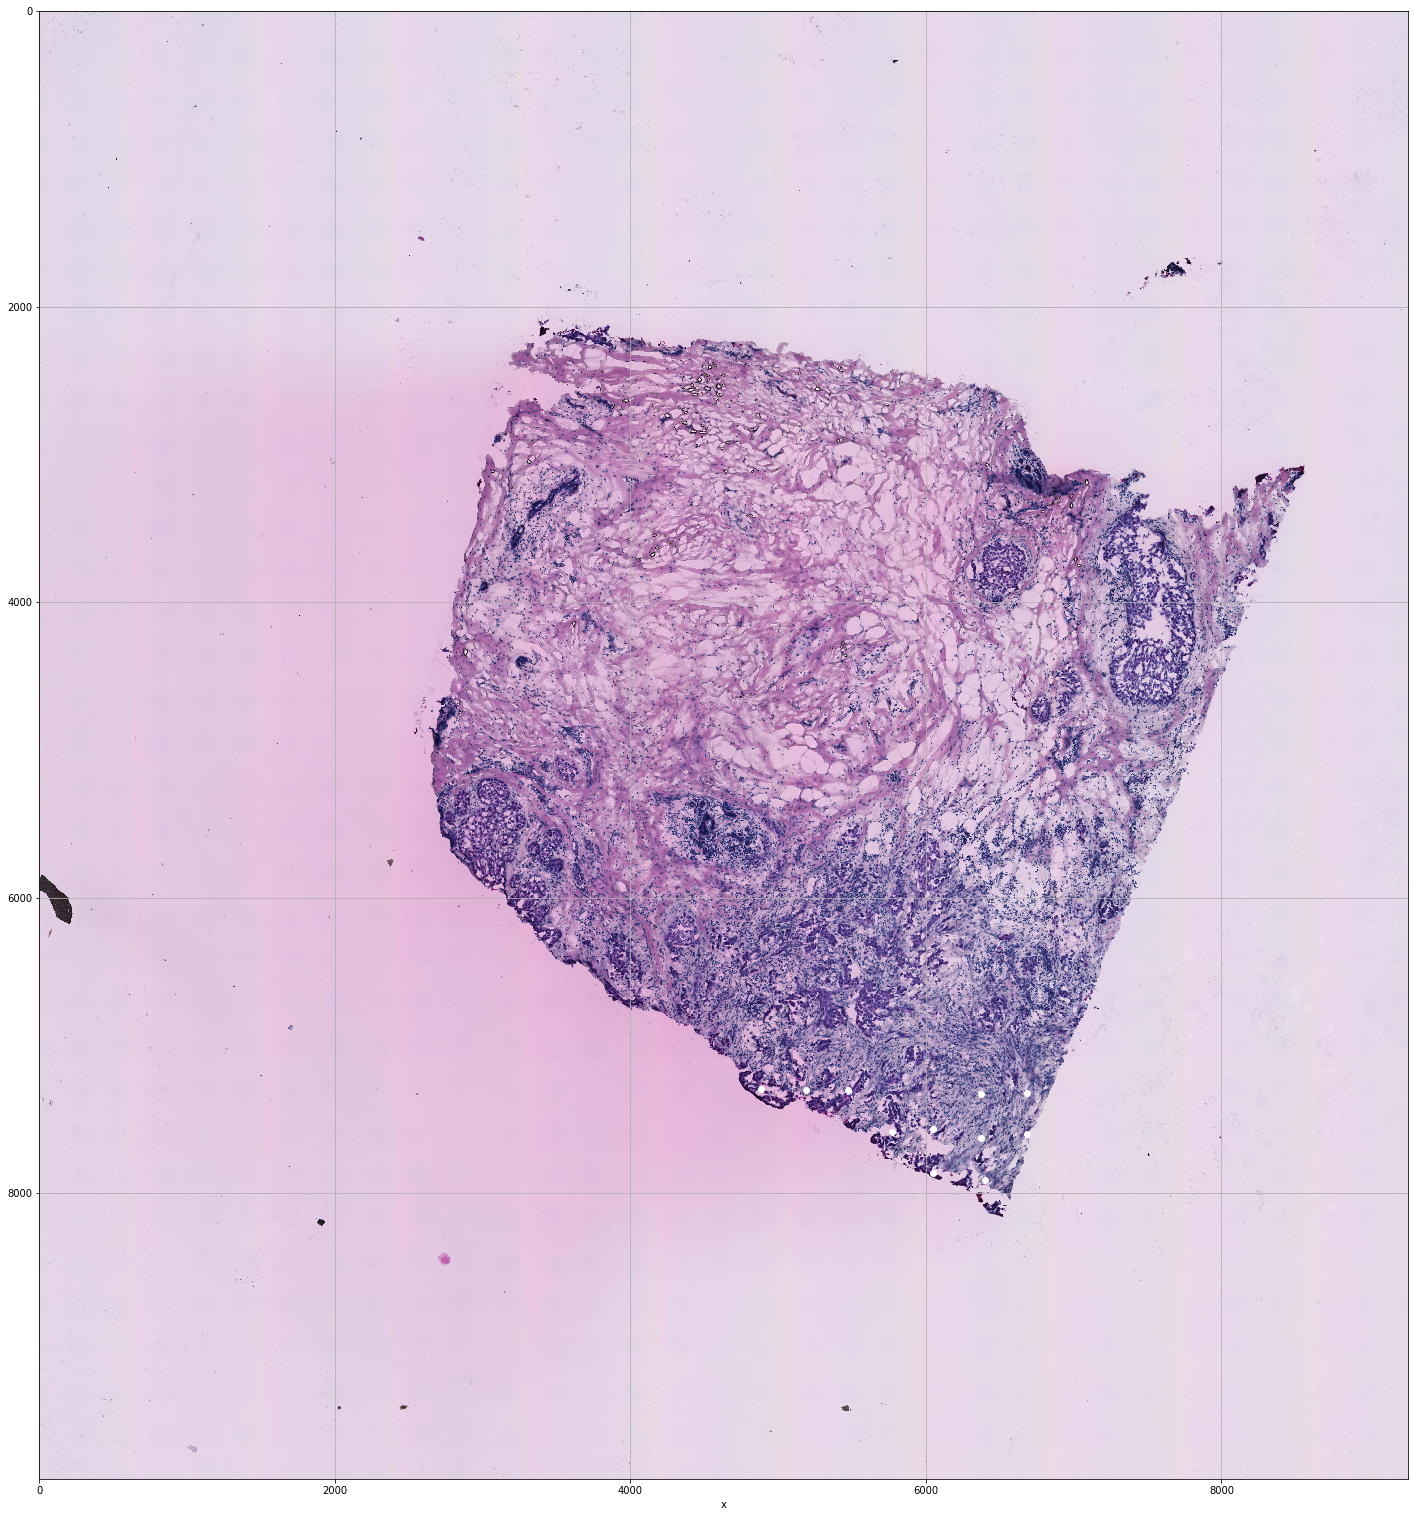

In [4]:
plot(251,262)

Finally, we can plot our true labels against the image to see how we did.

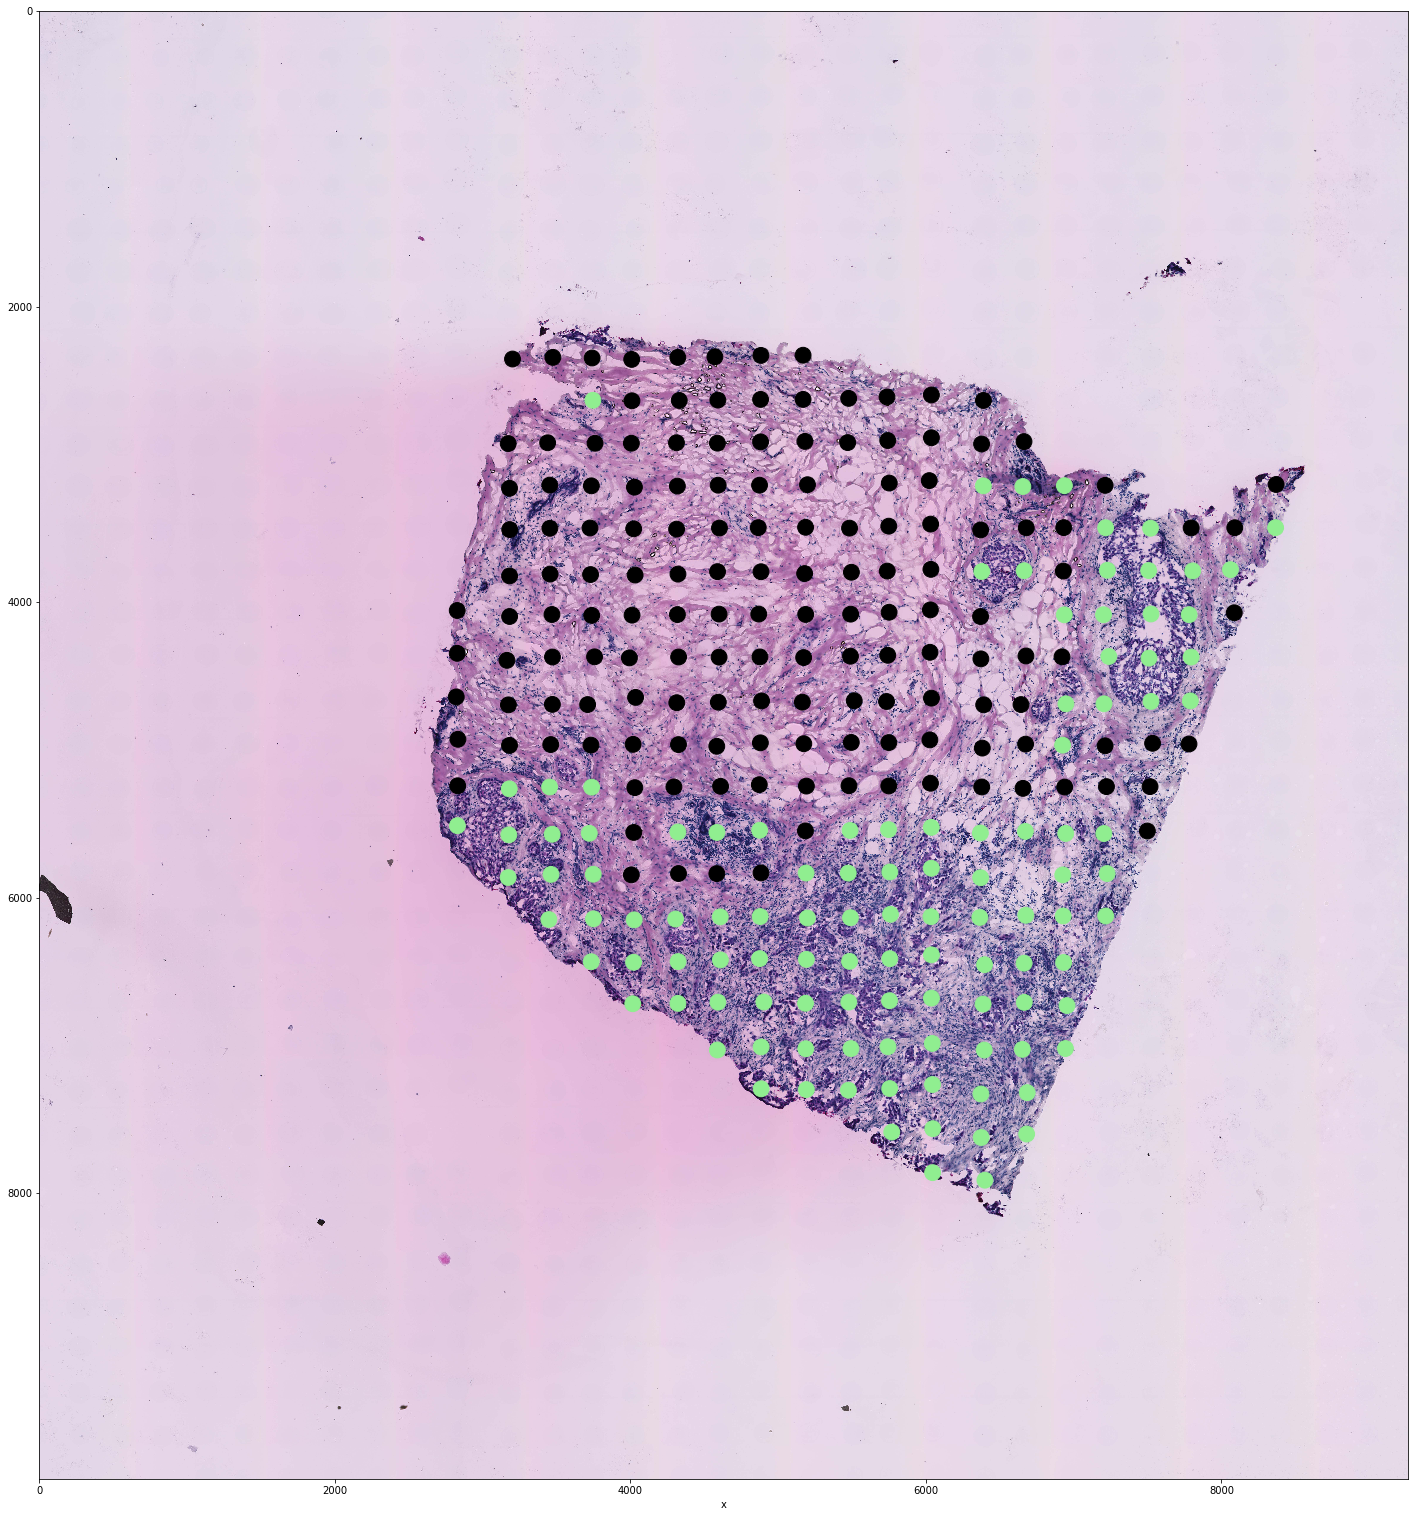

In [5]:
true_labels_file = path+'/breast_cancer_data/layer4_true_labels.txt'
true_labels = pd.read_csv(true_labels_file, delimiter="\t")
true_labels = true_labels['label']

plt.figure(figsize= (27,27))
colors = ['black', "#90ee90"]
plt.scatter(spatial_xy['x'], spatial_xy['y'], c=true_labels, cmap=matplotlib.colors.ListedColormap(colors), s=250)
plt.imshow(image)
plt.xlabel('x')
plt.show()